<a href="https://colab.research.google.com/github/lucasfreire01/Traffic_signs/blob/main/Trafict_signs_all_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#Importing libraries
import tensorflow as tf

In [48]:
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
import PIL
import pandas as pd
import seaborn as sns
import zipfile
from tensorflow.keras import layers

# **Pre_Process**

In [49]:
# MARKER_START_PRE_PROCESS

In [50]:
# ... Pre-processing code ...

In [51]:
#load databases
def open_file(file_load):
  zip = zipfile.ZipFile(file=file_load, mode='r')
  zip.extractall('./')
  zip.close

In [52]:
train = open_file('/content/drive/MyDrive/train.pickle.zip')
test = open_file('/content/drive/MyDrive/test.pickle.zip')
valid = open_file('/content/drive/MyDrive/valid.pickle.zip')

In [53]:
with open('/content/train.pickle', mode='rb') as training:
  train = pickle.load(training)
with open('/content/test.pickle', mode='rb') as test:
  test = pickle.load(test)
with open('/content/valid.pickle', mode='rb') as valid:
  valid = pickle.load(valid)

In [54]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [55]:
#split in train, test and valid
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']
x_valid, y_valid = valid['features'], valid['labels']

In [56]:
x_train.shape

(34799, 32, 32, 3)

In [57]:
y_train.shape

(34799,)

In [58]:
x_test.shape

(12630, 32, 32, 3)

In [59]:
x_valid.shape

(4410, 32, 32, 3)

20

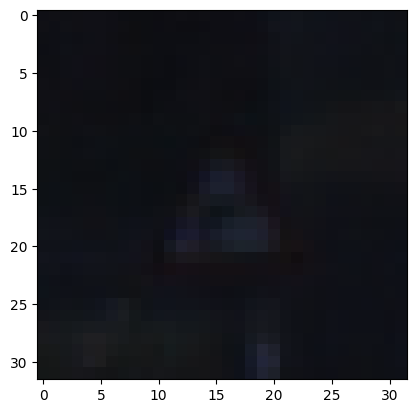

In [60]:
#See a random picture
import random
i = random.randint(1000, 34799)
plt.imshow(x_train[i])
y_train[i]

In [61]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [62]:
#transforming in gray images
x_train_gray = np.sum(x_train / 3, axis=3, keepdims=True)
x_test_gray = np.sum(x_test / 3, axis=3, keepdims=True)
x_valid_gray = np.sum(x_valid / 3, axis=3, keepdims=True)

In [63]:
x_train_gray.shape

(34799, 32, 32, 1)

In [64]:
#normalization values
x_train_gray_norm = (x_train_gray - 255) / 255
x_test_gray_norm = (x_test_gray - 255) / 255
x_valid_gray_norm = (x_valid_gray - 255) / 255

In [65]:
np.max(x_train_gray_norm)

0.0

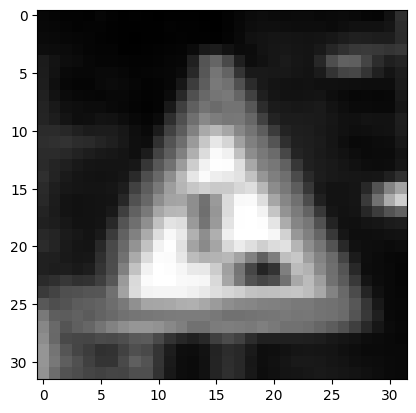

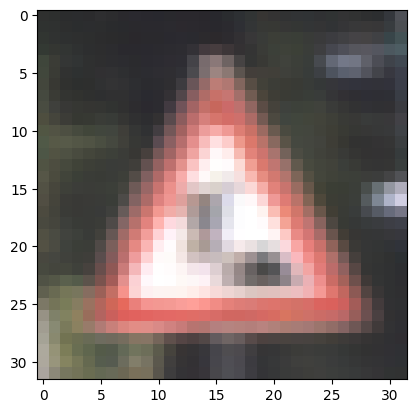

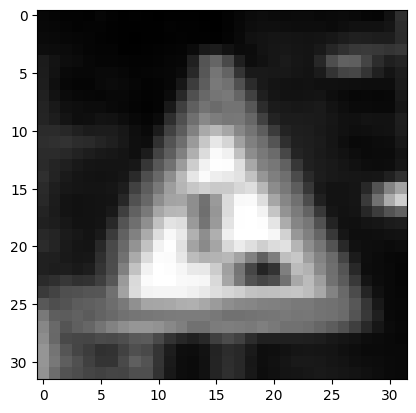

In [66]:
#see a image in corlorful gray and gray_norm to the train, test and valid datasets
i = random.randint(0, 34799)
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap='gray')

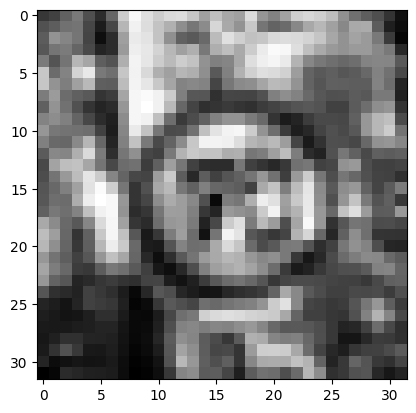

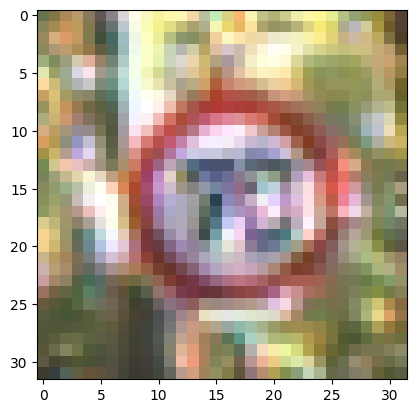

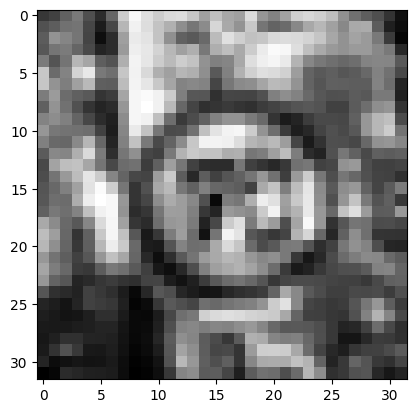

In [67]:
i = random.randint(0, 12630)
plt.imshow(x_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_test[i])
plt.figure()
plt.imshow(x_test_gray_norm[i].squeeze(), cmap='gray')

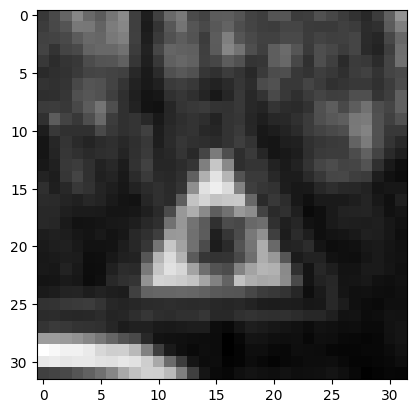

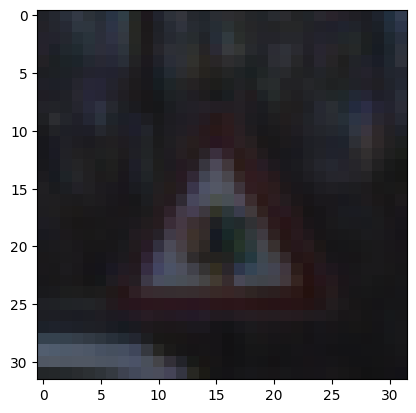

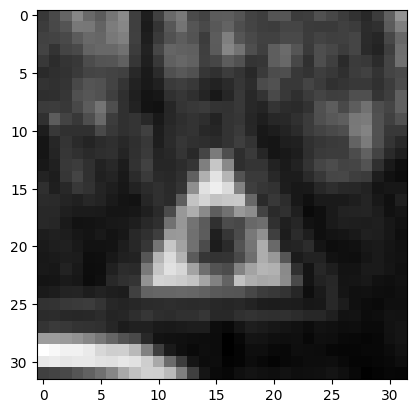

In [68]:
i = random.randint(0, 4410)
plt.imshow(x_valid_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_valid[i])
plt.figure()
plt.imshow(x_valid_gray_norm[i].squeeze(), cmap='gray')

In [69]:
# MARKER_END_PRE_PROCESS

# **Model**

In [70]:
# MARKER_START_MODEL

In [71]:
# ... Model code ...

In [72]:
#build the model
from tensorflow.keras import layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation='relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))
LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))

LeNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [73]:
#compile the compile
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [74]:
#fit the train values in the model
hist = LeNet.fit(x_train_gray_norm, y_train,
                 batch_size=500,
                 epochs = 50,
                 validation_data = (x_valid_gray_norm, y_valid))

Epoch 1/50
70/70 [==============================] - 21s 281ms/step - loss: 3.4090 - accuracy: 0.1214 - val_loss: 3.1644 - val_accuracy: 0.1671
Epoch 2/50
70/70 [==============================] - 16s 233ms/step - loss: 2.2578 - accuracy: 0.3943 - val_loss: 1.8732 - val_accuracy: 0.4628
Epoch 3/50
70/70 [==============================] - 16s 233ms/step - loss: 1.2846 - accuracy: 0.6397 - val_loss: 1.2660 - val_accuracy: 0.6039
Epoch 4/50
70/70 [==============================] - 16s 232ms/step - loss: 0.8905 - accuracy: 0.7517 - val_loss: 0.9501 - val_accuracy: 0.7134
Epoch 5/50
70/70 [==============================] - 16s 233ms/step - loss: 0.7154 - accuracy: 0.8016 - val_loss: 0.8613 - val_accuracy: 0.7444
Epoch 6/50
70/70 [==============================] - 16s 233ms/step - loss: 0.6000 - accuracy: 0.8356 - val_loss: 0.8411 - val_accuracy: 0.7363
Epoch 7/50
70/70 [==============================] - 16s 229ms/step - loss: 0.5275 - accuracy: 0.8569 - val_loss: 0.8209 - val_accuracy: 0.7467

In [75]:
score = LeNet.evaluate(x_test_gray_norm, y_test)
print('Test Acurracy: {}'.format(score[1]))

395/395 [==============================] - 3s 8ms/step - loss: 1.4671 - accuracy: 0.8503
Test Acurracy: 0.8502771258354187


In [76]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [77]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

<ipython-input-78-e1df10769e60>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Acuracy')


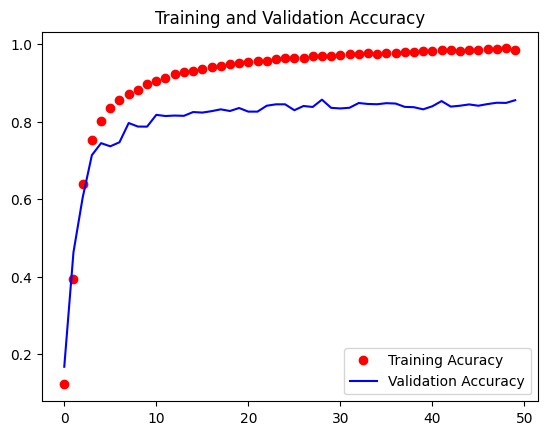

In [78]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Acuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend();

<ipython-input-79-037fdd844158>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'ro', color = 'r', label='Training Loss')


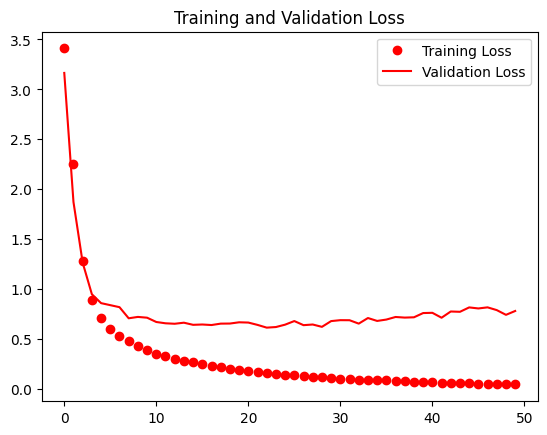

In [79]:
plt.plot(epochs, loss, 'ro', color = 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend();

In [80]:
predict_x = LeNet.predict(x_test_gray_norm)
predicted_classes=np.argmax(predict_x,axis=1)
y_true = y_test

395/395 [==============================] - 3s 7ms/step


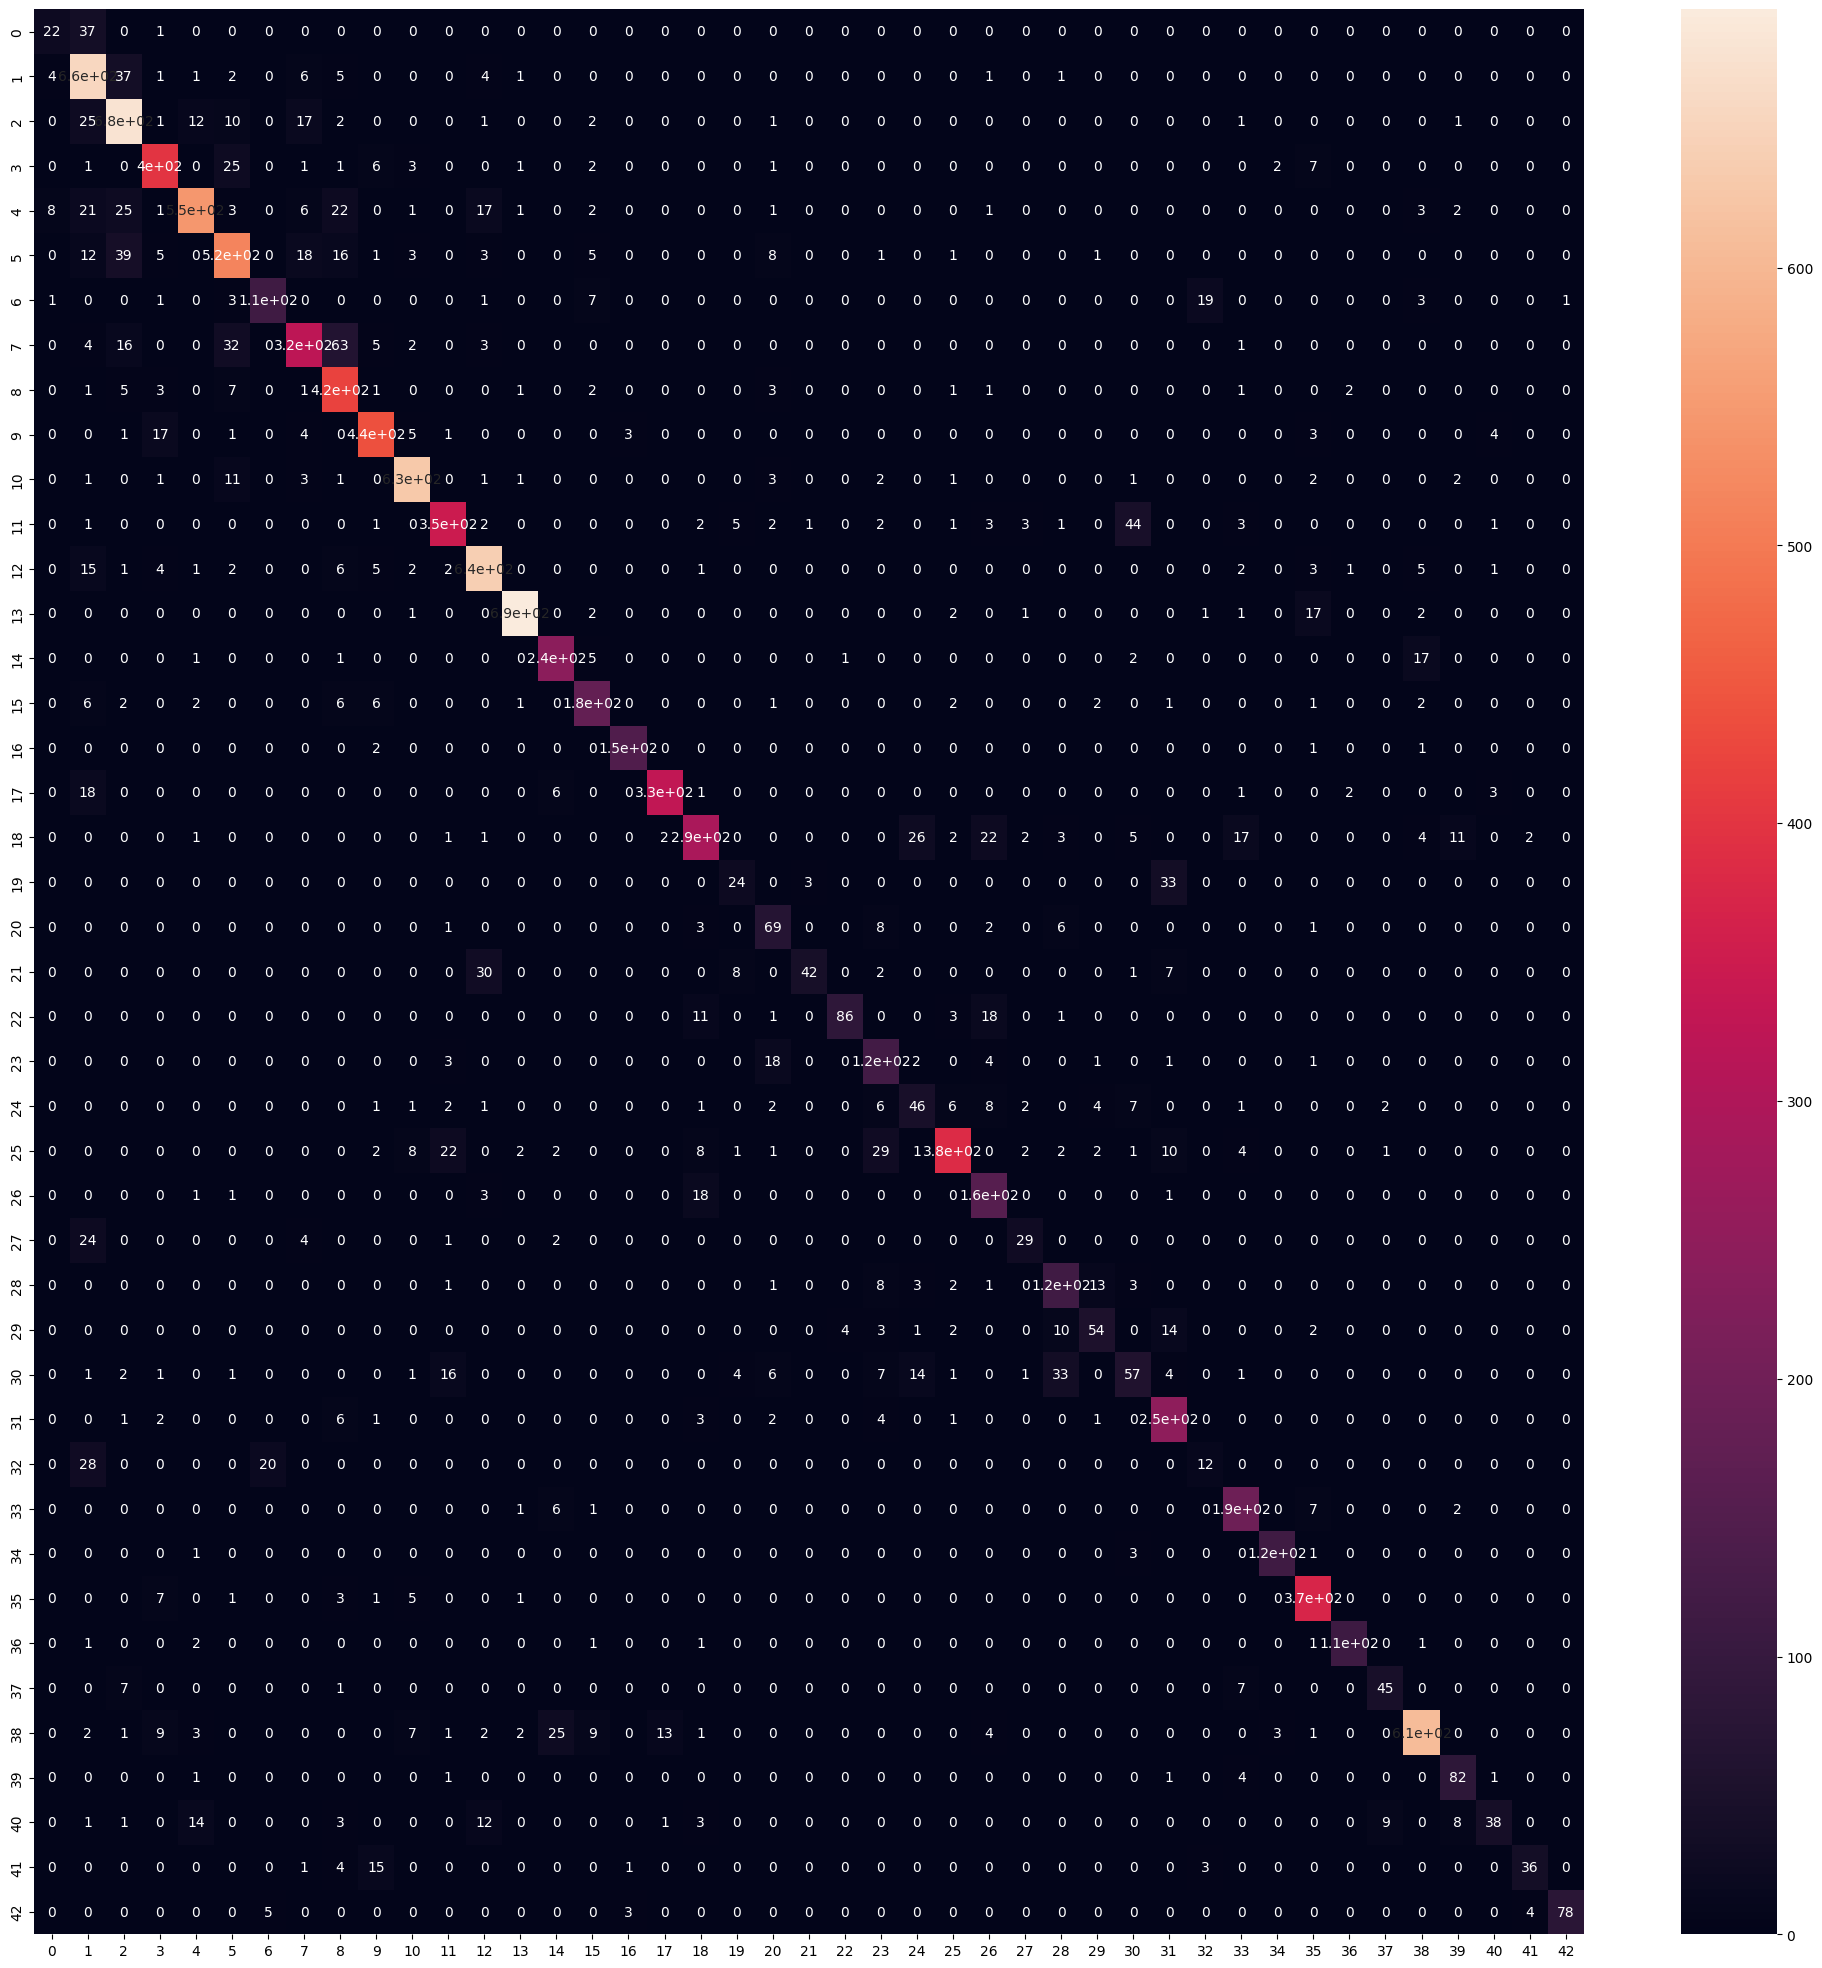

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

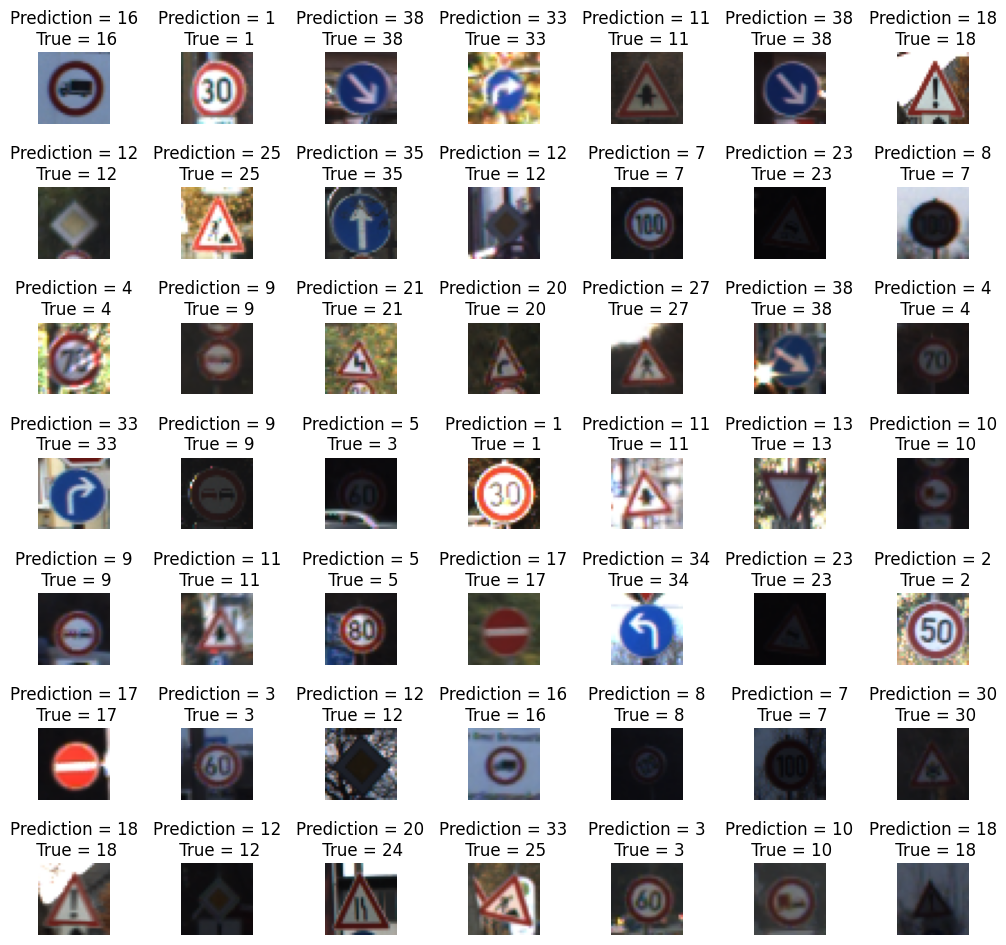

In [82]:
#see a frame of the result
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [83]:
# MARKER_END_MODEL

In [84]:
import os

def extract_code(source, start_marker, end_marker):
    start = source.find(start_marker)
    end = source.find(end_marker, start) + len(end_marker)
    return source[start:end]

def save_to_file(code, filename):
    # Create the directory if it doesn't exist
    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory)

    with open(filename, 'w', encoding='utf-8') as file:
        file.write(code)

# Update the file path based on where you uploaded 'Trafict_signs_all_code.ipynb'
notebook_file_path = '/content/Trafict_signs_all_code.ipynb'

# Check if the notebook file exists
if os.path.exists(notebook_file_path):
    with open(notebook_file_path, 'r', encoding='utf-8') as source_file:
        source_code = source_file.read()

    pre_processing_code = extract_code(source_code, '# MARKER_START_PRE_PROCESS', '# MARKER_END_PRE_PROCESS')
    model_code = extract_code(source_code, '# MARKER_START_MODEL', '# MARKER_END_MODEL')

    # Save the extracted code to 'pre_processing.py' and 'model.py'
    save_to_file(pre_processing_code, '/content/pre_processing.ipynb')
    save_to_file(model_code, '/content/model.ipynb')

else:
    print(f"Notebook file not found: {notebook_file_path}")

